In [33]:
import subprocess
import pandas as pd
from IPython.display import display

request_count = 1000
data = {}
is_defined = False

for i in range(request_count):
    scan_cmd = subprocess.Popen(['airport', '-I'], stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    scan_out, scan_err = scan_cmd.communicate()

    # Byte veriyi string veriye çevirelim.
    scan_out = scan_out.decode('utf-8')
    lines = scan_out.split('\n')

    # build key values for dict
    if is_defined == False:
        for line in lines:
            try:
                key , value = line.strip().split(':')
                data[key] = []
            except ValueError:
                continue
        is_defined = True

    # build values for dict
    if is_defined == True:
        for line in lines:
            try:
                key , value = line.strip().split(':')
                data[key].append(value)
            except ValueError:
                continue

# Pandas DataFrame oluşturun
data_frame = pd.DataFrame(data)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)





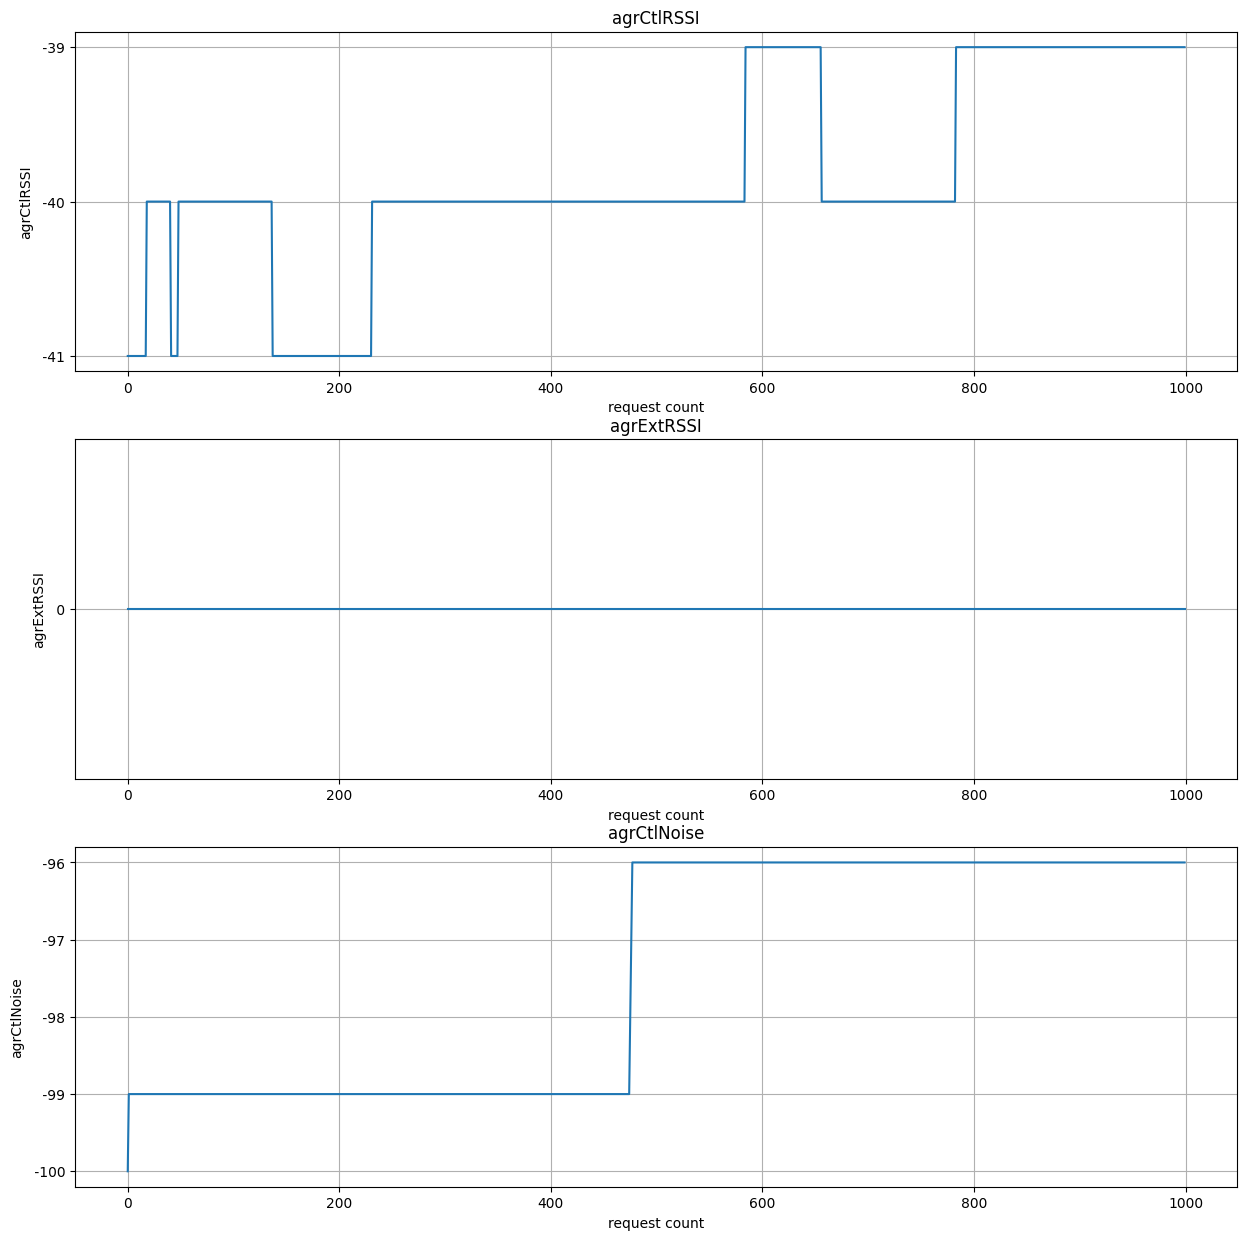

In [34]:
import matplotlib.pyplot as plt
pass_key = ['state', 'op_mode', 'lastAssocStatus', '802.11 auth', 'link auth', 'BSSID', 'SSID', 'MCS', 'channel', 'HT', 'CC' , "op mode" , "" , " "]
#subplots for every key
figure_count = len(data.keys())-len(pass_key)
fig, axs = plt.subplots(figure_count, figsize=(15, 15))


for i, key in enumerate(data.keys()):
    if i >= figure_count:
        break
    if key not in pass_key:
        axs[i].plot(data[key])
        axs[i].set_title(key)
        axs[i].set_xlabel('request count')
        axs[i].set_ylabel(key)
        axs[i].grid(True)

plt.show()